In [72]:
# Import necessary libraries :-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pickle

In [73]:
# Read csv file and convert it into a dataframe:-
happiness_score_df = pd.read_csv(r"C:/Users/swati/Downloads/DSData-master/DSData-master/happiness_score_dataset.csv")
happiness_score_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [74]:
# Check size of dataframe:-
happiness_score_df.shape


(158, 12)

In [75]:
## Checking metadata  like null values ,column data types of dataframe:-
happiness_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
## Checking null values
happiness_score_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Dataframe has not any null value.

In [76]:
# Understand the data 
happiness_score_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Country, Region, Happiness Rank,Standard Error and Dystopia Residual ,these columns have not much contribution in predicting Happiness Score,So it's good to delete these columns.  

In [77]:
happiness_score_df.drop(columns = ['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'],axis =1,inplace = True)

C:\Users\swati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\swati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

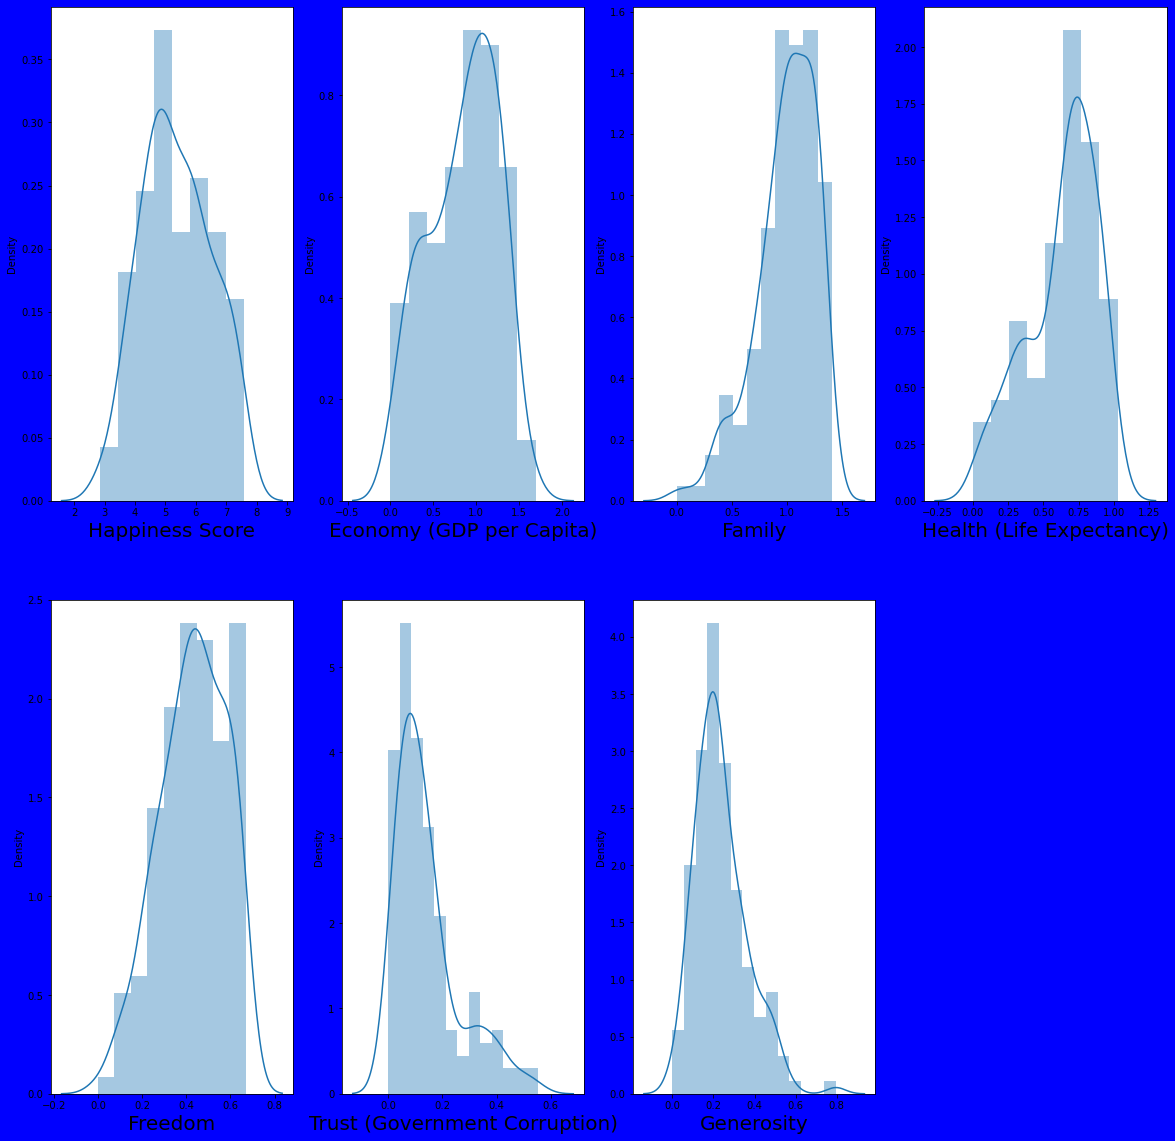

In [78]:
## Data Visualization,check how data is distributed with every column:-
plt.figure(figsize=(20,20),facecolor = 'blue')
plotnumber = 1
for column in happiness_score_df:
    if plotnumber <=7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(happiness_score_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()    

Data distribytion seems normal,not very much skewed.Since dataset is not very big,so will ignore little bit skewness and outliers.

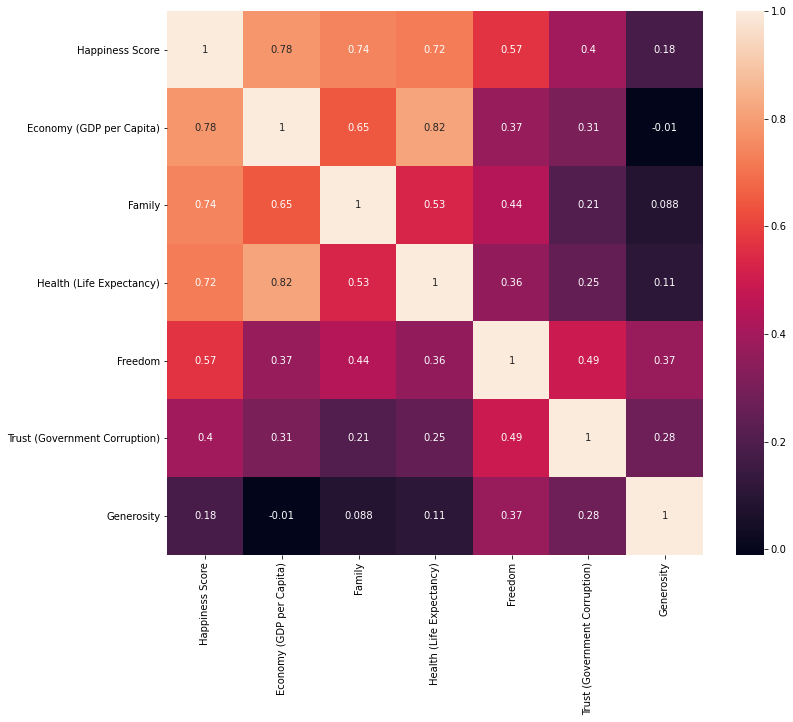

In [19]:
## checking multicolinearity:-
plt.figure(figsize=(12,10))
sns.heatmap(happiness_score_df.corr(),annot =True)
plt.show()

By analysing heatmap,all  independent columns have good bond with dependent column.Health life expectancy and Economy are 82% 
corelated,but we have very few columns so at this point, will not delete any column.

In [23]:
X = happiness_score_df.drop(columns = ['Happiness Score'],axis =1 )
y= happiness_score_df['Happiness Score']
X


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


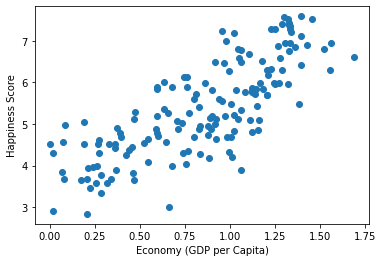

In [39]:
 ## Visualizing Relationship:-
# plt.figure(figsize = (20,20),facecolor = 'red')    
# plotnumber =1
# for column in X:
#     if plotnumber <= 15:
        
#         ax = plt.subplot(5,3,plotnumber)
#         plt.scatter(X[column],y)
#         plt.xlabel(column,fontsize = 20)
#         plt.ylabel(y,fontsize = 20)
#     plotnumber +=1    
# plt.show()    

plt.scatter(happiness_score_df['Economy (GDP per Capita)'],happiness_score_df['Happiness Score'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

plt.show()

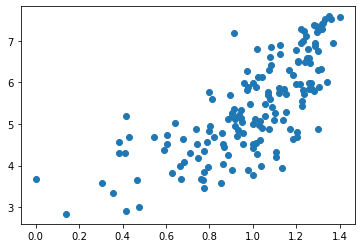

In [32]:
plt.scatter(happiness_score_df['Family'],happiness_score_df['Happiness Score'])
plt.show()

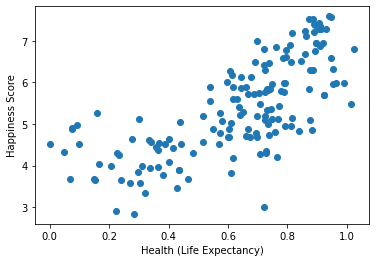

In [38]:
plt.scatter(happiness_score_df['Health (Life Expectancy)'], happiness_score_df['Happiness Score'])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()

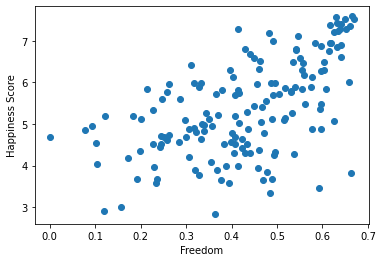

In [40]:
plt.scatter(happiness_score_df['Freedom'],happiness_score_df['Happiness Score'])
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

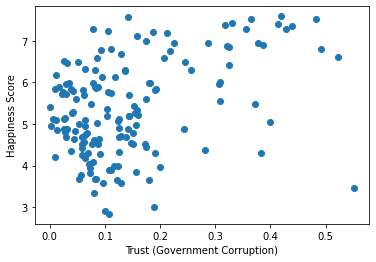

In [41]:
plt.scatter(happiness_score_df['Trust (Government Corruption)'],happiness_score_df['Happiness Score'])
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.show()

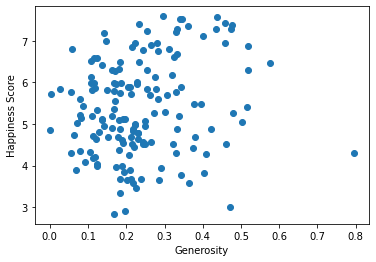

In [42]:
plt.scatter(happiness_score_df['Generosity'],happiness_score_df['Happiness Score'])
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

In [44]:
# Data Standardization to avoid overfitting.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 1.36962124e+00,  1.32028142e+00,  1.26340809e+00,
         1.57743784e+00,  2.30965159e+00,  4.71039706e-01],
       [ 1.13522625e+00,  1.51445776e+00,  1.28943383e+00,
         1.33245589e+00, -1.64795307e-02,  1.57585637e+00],
       [ 1.19286069e+00,  1.36105403e+00,  9.92228817e-01,
         1.46965910e+00,  2.84277380e+00,  8.24292797e-01],
       [ 1.52512972e+00,  1.25192192e+00,  1.03514490e+00,
         1.60513145e+00,  1.85208080e+00,  8.68637502e-01],
       [ 1.19487640e+00,  1.22120434e+00,  1.11805373e+00,
         1.36041579e+00,  1.55572536e+00,  1.74856316e+00],
       [ 1.10518965e+00,  1.20518259e+00,  1.05097959e+00,
         1.41846586e+00,  2.25900540e+00, -2.99762791e-02],
       [ 1.20271529e+00,  1.06489092e+00,  1.06612405e+00,
         1.24584679e+00,  1.46019962e+00,  1.89102052e+00],
       [ 1.20836426e+00,  1.09767107e+00,  1.13932906e+00,
         1.53902627e+00,  2.46560175e+00,  9.92406743e-01],
       [ 1.00547410e+00,  1.21037585e+00,  1.129

In [50]:
## Instatiating model
lr = LinearRegression()

In [66]:
##Splitting the dataframe and training the model : -
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 25)
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
## Saving the model to local file system
filename ='Happiness_Score.pickle'
pickle.dump(lr,open(filename,'wb'))



In [67]:
## Adjusted R2 score for training data : -
lr.score(x_train,y_train)

0.7813816419877546

In [68]:
## Adjusted R2 score for testing data : -
lr.score(x_test,y_test)

0.7545587638351345

In [69]:
#### Model Evaluation:-
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = lr.predict(x_test)
mean_absolute_error(y_test,y_pred)

0.3693360251519983

In [70]:
mean_squared_error(y_test,y_pred)

0.21646467893123114

In [71]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.4652576479019245

In [ ]:
## Conclusion : -
a =np.array(y_test)
predicted = np.array(lr.predict(x_test))
df =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,index 
                   })